In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib import gridspec
import scanpy as sc
from pathlib import Path
import scanpy as sc
import anndata
import muon 
import cnmf
import os

### Use torch-cNMF with git clone the repo at: https://github.com/ymo6/torch_based_cNMF.git
### Then use pip install -e .


In [8]:
numiter=10  
numhvgenes=5451  
K = [30, 50, 60, 80, 100, 200, 250, 300] 
seed = 14
loss = 'frobenius'
init = 'random'
mode = "batch"
algo = 'mu'
tol = 1e-4
batch_max_iter = 500
online_max_pass = 20
online_chunk_size = 5000
online_chunk_max_iter = 200
online_usage_tol = 0.05
online_spectra_tol = 0.05


counts_fn = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Cell_data/10K_cell.h5ad"
output_directory = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/torch-cNMF_evaluation"
run_name = "10k_cells_10iter_batch"

In [9]:

cnmf_obj = cnmf.cNMF(output_dir=output_directory, name=run_name)


In [10]:
cnmf_obj.prepare(counts_fn=counts_fn, components=K, n_iter=numiter, densify=False, tpm_fn=None, num_highvar_genes=numhvgenes, genes_file=None,
                init = init,  beta_loss = loss, 
                algo = algo,mode = mode, tol=tol, total_workers=1, 
                seed=seed,  use_gpu = True, 
                alpha_usage=0.0, alpha_spectra=0.0, 
                l1_ratio_usage = 0.0, l1_ratio_spectra = 0.0,
                online_usage_tol=online_usage_tol, online_spectra_tol=online_spectra_tol,
                fp_precision = 'float', 
                batch_max_iter=batch_max_iter, batch_hals_tol = 0.05, batch_hals_max_iter = 200,
                online_max_pass=online_max_pass, online_chunk_size=online_chunk_size, online_chunk_max_iter=online_chunk_max_iter)


/oak/stanford/groups/engreitz/Users/ymo/Tools/torch_based_cNMF/src/cnmf/cnmf.py:791: UserWarning: 80 runs already appear completed. If this is unexpected, consider
            re-initializing the cnmf object with a different run name or output directory
  warnings.warn(message, UserWarning)


In [11]:
cnmf_obj.factorize(total_workers = 1)

[Worker 0]. Starting task 0.
Use GPU mode.
 niter=10, loss=7205.500954132197.
 niter=20, loss=7109.942475154071.
 niter=30, loss=7078.588701146578.
 niter=40, loss=7066.115340128549.
 niter=50, loss=7059.5787409731465.
 niter=60, loss=7055.76048346314.
 niter=70, loss=7053.343214391314.
 niter=80, loss=7051.6171549510545.
 niter=90, loss=7050.2729734386885.
 niter=100, loss=7049.172291836822.
 niter=110, loss=7048.233537561025.
 niter=120, loss=7047.388452469468.
 niter=130, loss=7046.5808730191975.
 niter=140, loss=7045.823869498868.
 niter=150, loss=7045.211565311577.
    Converged after 150 iteration(s).
[Worker 0]. Starting task 1.
Use GPU mode.
 niter=10, loss=7193.048901543768.
 niter=20, loss=7110.834972069033.
 niter=30, loss=7080.48465855269.
 niter=40, loss=7067.549080126717.
 niter=50, loss=7060.716748319536.
 niter=60, loss=7056.645803779583.
 niter=70, loss=7053.970016947903.
 niter=80, loss=7051.990570044744.
 niter=90, loss=7050.334282854963.
 niter=100, loss=7048.869838

In [12]:
cnmf_obj.combine()

Combining factorizations for k=30.
Combining factorizations for k=50.
Combining factorizations for k=60.
Combining factorizations for k=80.
Combining factorizations for k=100.
Combining factorizations for k=200.
Combining factorizations for k=250.
Combining factorizations for k=300.


Use GPU mode.
Use GPU mode.
Use GPU mode.
Use GPU mode.
Use GPU mode.
Use GPU mode.
Use GPU mode.
Use GPU mode.


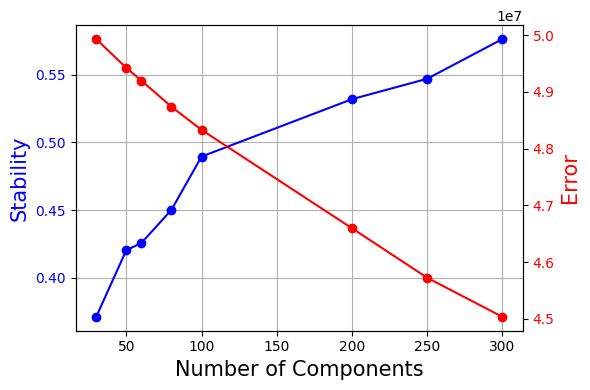

In [13]:
cnmf_obj.k_selection_plot()

In [14]:
from tqdm.auto import tqdm

def run_cnmf_consensus(cnmf_obj=None, output_dir=None, name=None, 
                       components=[7,8,9,10], density_thresholds=[0.01, 0.05, 2.0]):

    if cnmf_obj is None:
        cnmf_obj = init_cnmf_obj(output_dir=output_dir, name=name)

    for k in tqdm(components, desc='Running cNMF'):
        for thresh in density_thresholds:
            cnmf_obj.consensus(k=k, density_threshold=thresh, show_clustering=True)
    

In [15]:
# Consensus plots with all k to choose thresh

sel_thresh = 2
run_cnmf_consensus(cnmf_obj, 
                components=K, 
                density_thresholds=[2.0])

Running cNMF:   0%|          | 0/8 [00:00<?, ?it/s]

Use GPU mode.
Use GPU mode.


/home/users/ymo/.local/lib/python3.9/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Use GPU mode.


Running cNMF:  12%|█▎        | 1/8 [00:10<01:14, 10.66s/it]

Use GPU mode.
Use GPU mode.


/home/users/ymo/.local/lib/python3.9/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Use GPU mode.


Running cNMF:  25%|██▌       | 2/8 [00:19<00:56,  9.37s/it]

Use GPU mode.
Use GPU mode.


/home/users/ymo/.local/lib/python3.9/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Use GPU mode.


Running cNMF:  38%|███▊      | 3/8 [00:28<00:47,  9.43s/it]

Use GPU mode.
Use GPU mode.


/home/users/ymo/.local/lib/python3.9/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Use GPU mode.


Running cNMF:  50%|█████     | 4/8 [00:42<00:44, 11.12s/it]

Use GPU mode.
Use GPU mode.


/home/users/ymo/.local/lib/python3.9/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Use GPU mode.


Running cNMF:  62%|██████▎   | 5/8 [01:01<00:41, 13.85s/it]

Use GPU mode.
Use GPU mode.


/home/users/ymo/.local/lib/python3.9/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Use GPU mode.


Running cNMF:  75%|███████▌  | 6/8 [01:55<00:55, 27.54s/it]

Use GPU mode.
Use GPU mode.


/home/users/ymo/.local/lib/python3.9/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Use GPU mode.


Running cNMF:  88%|████████▊ | 7/8 [03:27<00:48, 48.79s/it]

In [3]:
# Save all cNMF scores in separate mudata objects
sel_thresh = 2.0
components = [30, 50, 60, 80, 100, 200, 250, 300] 



for k in components:

    scores = pd.read_csv('{output_directory}/{run_name}/{run_name}.usages.k_{k}.dt_{sel_thresh}.consensus.txt'.format(
                                                                                    output_directory=output_directory,
                                                                                    run_name = run_name,
                                                                                    k=k,
                                                                                    sel_thresh = str(sel_thresh).replace('.','_')),
                                                                                    sep='\t', index_col=0)

    loadings = pd.read_csv('{output_directory}/{run_name}/{run_name}.spectra.k_{k}.dt_{sel_thresh}.consensus.txt'.format(
                                                                                    output_directory=output_directory,
                                                                                    run_name = run_name,
                                                                                    k=k,
                                                                                    sel_thresh = str(sel_thresh).replace('.','_')),
                                                                                    sep='\t', index_col=0)
    

    os.makedirs((f'{output_directory}/{run_name}/loading'), exist_ok=True)


    scores.to_csv('{output_directory}/{run_name}/loading/cNMF_scores_{k}_{sel_thresh}.txt'.format(
                                                                                    output_directory=output_directory,
                                                                                    run_name = run_name,
                                                                                    k=k,
                                                                                    sel_thresh = sel_thresh), sep='\t')
    loadings.T.to_csv('{output_directory}/{run_name}/loading/cNMF_loadings_{k}_{sel_thresh}.txt'.format(     
                                                                                    output_directory=output_directory,
                                                                                    run_name = run_name,
                                                                                    k=k,
                                                                                    sel_thresh = sel_thresh), sep='\t')

    adata_ = anndata.read_h5ad('{output_directory}/{run_name}/cnmf_tmp/{run_name}.tpm.h5ad'.format(
                                                                                    output_directory=output_directory,
                                                                                    run_name = run_name,
                                                                                    k=k ))
    adata_.var_names_make_unique()
    adata_.obs_names_make_unique()

    prog_data = anndata.AnnData(X=scores.values, obs=adata_.obs)
    prog_data.varm['loadings'] = loadings.values
    prog_data.uns['var_names'] = loadings.columns.values

    os.makedirs((f'{output_directory}/{run_name}/prog_data'), exist_ok=True)
    prog_data.write(f'{output_directory}/{run_name}/cNMF_{k}_{sel_thresh}.h5ad')

    # Make mdata
    mdata = muon.MuData({'rna': adata_, 'cNMF': prog_data})

    os.makedirs((f'{output_directory}/{run_name}/adata'), exist_ok=True)
    mdata.write('{output_directory}/{run_name}/adata/cNMF_{k}_{sel_thresh}.h5mu'.format(
                                                                            output_directory=output_directory,
                                                                            run_name = run_name,
                                                                            k=k,
                                                                            sel_thresh = str(sel_thresh).replace('.','_')))
                                                                            